In [1]:
pip install pydicom

     |████████████████████████████████| 1.9 MB 297 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


## Image inverse

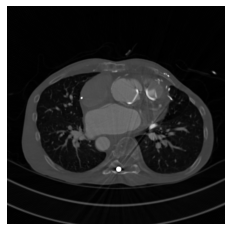

In [2]:
import cv2
import matplotlib.pyplot as plt

# Opening the image.
im = cv2.imread('../Figures/imageinverse_input.png')
# Performing the inversion operation
im2 = 255 - im
# Saving the image as imageinverse_output.png in
# Figures folder.
plt.imshow(im)
plt.axis("off")
plt.show()

## Power Law Transformation

/home/marvin/anaconda3/envs/andreasC/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/home/marvin/anaconda3/envs/andreasC/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log


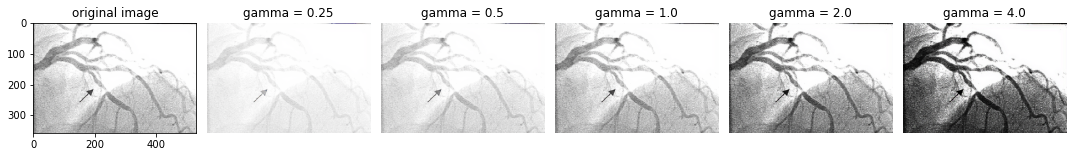

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Opening the image.
a = cv2.imread('../Figures/angiogram1.png')
# gamma is initialized.
gamma = 0.5
# b is converted to type float.
b1 = a.astype(float)
# Maximum value in b1 is determined.
b3 = np.max(b1)
# b1 is normalized 
b2 = b1/b3
# gamma-correction exponent is computed.
b4 = np.log(b2)*gamma
# gamma-correction is performed.
c = np.exp(b4)*255.0
# c is converted to type int.
c1 = c.astype(int)
# Displaying c1
#plt.axis("off")
#plt.imshow(c1)
#plt.show()

rows = 1
cols = 6
axes=[]
fig=plt.figure(figsize=(15, 15))
for i in range(rows*cols):
    if i == 0:
        axes.append( fig.add_subplot(rows, cols, i+1) )
        subplot_title=("original image")
        axes[-1].set_title(subplot_title)  
        plt.imshow(a)
    else:
        gamma = 0.25 *2**(i-1)
        # b is converted to type float.
        b1 = a.astype(float)
        # Maximum value in b1 is determined.
        b3 = np.max(b1)
        # b1 is normalized 
        b2 = b1/b3
        # gamma-correction exponent is computed.
        b4 = np.log(b2)*gamma
        # gamma-correction is performed.
        c = np.exp(b4)*255.0
        # c is converted to type int.
        c1 = c.astype(int)

        axes.append( fig.add_subplot(rows, cols, i+1) )
        subplot_title=("gamma = "+str(gamma))
        axes[-1].set_title(subplot_title)  
        plt.imshow(c1)
        plt.axis("off")
fig.tight_layout()    
plt.show()


## when gamma value increase darker area become wider, while when the gamma value decrease the bright area become wider

## Log transformation

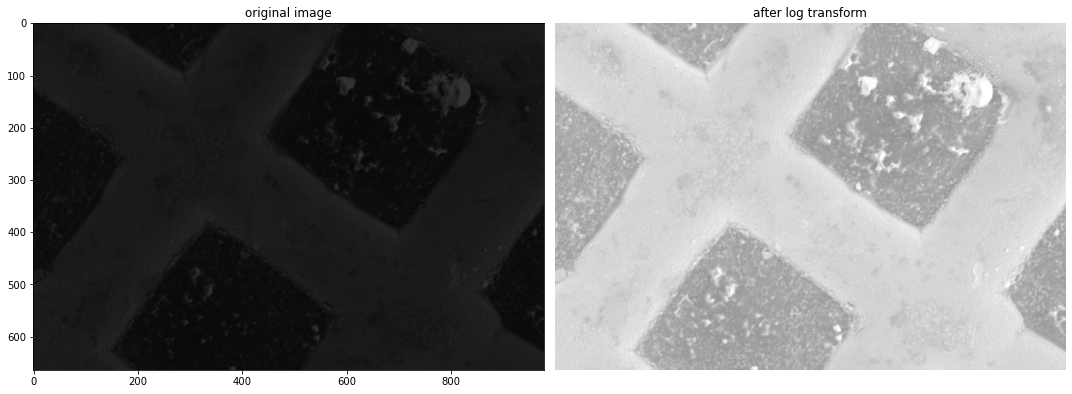

In [14]:
import cv2
import numpy, math
import matplotlib.pyplot as plt

# Opening the image.
a = cv2.imread('../Figures/bse.png')
# a is converted to type float.
b1 = a.astype(float)
# Maximum value in b1 is determined.
b2 = numpy.max(b1)
# Performing the log transformation.
c = (255.0*numpy.log(1+b1))/numpy.log(1+b2)
# c is converted to type int.
c1 = c.astype(int)
# Saving c1 as logtransform_output.png.
rows = 1
cols = 2
axes=[]
fig=plt.figure(figsize=(15, 15))
for i in range(rows*cols):
    if i == 0:
        axes.append( fig.add_subplot(rows, cols, i+1) )
        subplot_title=("original image")
        axes[-1].set_title(subplot_title)  
        plt.imshow(a)
    else:
        b1 = a.astype(float)
        # Maximum value in b1 is determined.
        b2 = numpy.max(b1)
        # Performing the log transformation.
        c = (255.0*numpy.log(1+b1))/numpy.log(1+b2)
        # c is converted to type int.
        c1 = c.astype(int)

        axes.append( fig.add_subplot(rows, cols, i+1) )
        subplot_title=("after log transform")
        axes[-1].set_title(subplot_title)  
        plt.imshow(c1)
        plt.axis("off")
fig.tight_layout()    
plt.show()


## Histogram equalization

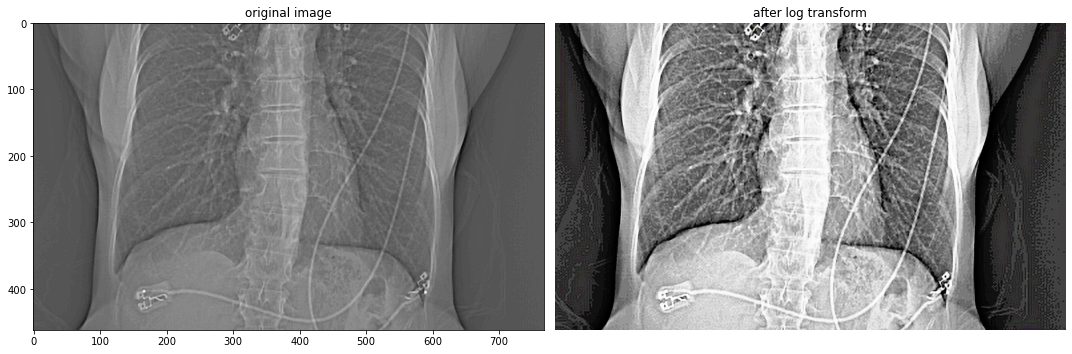

In [3]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

# Opening the image.
img1 = cv2.imread('../Figures/hequalization_input.png')
# 2D array is converted to a 1D array.
fl = img1.flatten()
# Histogram and the bins of the image are computed.
hist,bins = np.histogram(img1,256,[0,255])
# cumulative distribution function is computed 
cdf = hist.cumsum()
# Places where cdf=0 is masked or ignored and 
# rest is stored in cdf_m.
cdf_m = np.ma.masked_equal(cdf,0)
# Histogram equalization is performed.
num_cdf_m = (cdf_m - cdf_m.min())*255
den_cdf_m = (cdf_m.max()-cdf_m.min())
cdf_m = num_cdf_m/den_cdf_m
# The masked places in cdf_m are now 0.
cdf = np.ma.filled(cdf_m,0).astype('uint8')
# cdf values are assigned in the flattened array.
im2 = cdf[fl]
# im2 is 1D so we use reshape command to.
#  make it into 2D. 
im3 = np.reshape(im2,img1.shape)
# Saving im3 as hequalization_output.png
# in Figures folder 
#plt.imshow(img1)
#plt.show()



rows = 1
cols = 2
axes=[]
fig=plt.figure(figsize=(15, 15))
for i in range(rows*cols):
    if i == 0:
        axes.append( fig.add_subplot(rows, cols, i+1) )
        subplot_title=("original image")
        axes[-1].set_title(subplot_title)  
        plt.imshow(img1)
    else:
        axes.append( fig.add_subplot(rows, cols, i+1) )
        subplot_title=("histogram equalization")
        axes[-1].set_title(subplot_title)  
        plt.imshow(im3)
        plt.axis("off")
fig.tight_layout()    
plt.show()


## contrast limited adaptive histogram equalization

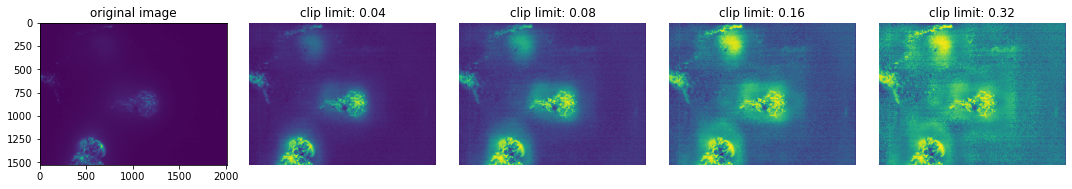

In [7]:
import cv2
from skimage.exposure import equalize_adapthist
import matplotlib.pyplot as plt

img = cv2.imread('../Figures/embryo.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Applying Clahe.
img2 = equalize_adapthist(img, clip_limit = 0.02)

# Rescaling img2 from 0 to 255.
img3 = img2*255.0
# Saving img3.
#.imshow(img)
#plt.show()

rows = 1
cols = 5
axes=[]
fig=plt.figure(figsize=(15, 15))
for i in range(rows*cols):
    if i == 0:
        axes.append( fig.add_subplot(rows, cols, i+1) )
        subplot_title=("original image")
        axes[-1].set_title(subplot_title)  
        plt.imshow(img)
    else:
        img2 = equalize_adapthist(img, clip_limit = 2**i*0.02)
        # Rescaling img2 from 0 to 255.
        img3 = img2*255.0
        axes.append( fig.add_subplot(rows, cols, i+1) )
        subplot_title=("clip limit: "+str(2**i*0.02))
        axes[-1].set_title(subplot_title)  
        plt.imshow(img3)
        plt.axis("off")
fig.tight_layout()    
plt.show()




## as the clip limit increase, the enhancement of object increase, but if the clip limit too high the object become too bright

## contrast stretching

7 51


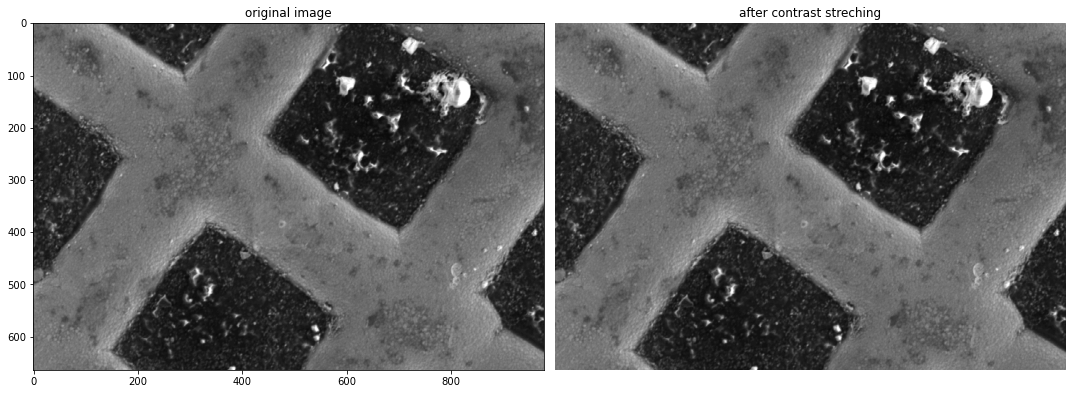

In [22]:
import cv2
import matplotlib.pyplot as plt

# Opening the image.
im = cv2.imread('../Figures/bse.png')
img = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
# Finding the maximum and minimum pixel values
b = im.max()
a = im.min()
print(a,b)
# Converting im1 to float.
c = img.astype(float)
# Contrast stretching transformation.
im1 = 255.0*(c-a)/(b-a)
im1 = im1.astype(int)
# Saving im2 as contrast_output2.png in
# Figures folder 
#plt.imshow(im1)
#plt.show() 





rows = 1
cols = 2
axes=[]
fig=plt.figure(figsize=(15, 15))
for i in range(rows*cols):
    if i == 0:
        axes.append( fig.add_subplot(rows, cols, i+1) )
        subplot_title=("original image")
        axes[-1].set_title(subplot_title)  
        im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        plt.imshow(im,cmap='gray')
    else:
        axes.append( fig.add_subplot(rows, cols, i+1) )
        subplot_title=("after contrast streching")
        axes[-1].set_title(subplot_title)  
        plt.imshow(im1,cmap='gray')
        plt.axis("off")
fig.tight_layout()    
plt.show()


## sigmoid correction

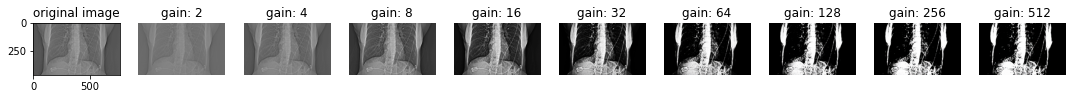

In [27]:
import cv2
from skimage.exposure import adjust_sigmoid
import matplotlib.pyplot as plt

# Reading the image.
img1 = cv2.imread('../Figures/hequalization_input.png')
# Applying Sigmoid correction.

# Saving img2.
#plt.imshow(img2)
#plt.show() 

rows = 1
cols = 10
axes=[]
fig=plt.figure(figsize=(15, 15))
for i in range(rows*cols):
    if i == 0:
        axes.append( fig.add_subplot(rows, cols, i+1) )
        subplot_title=("original image")
        axes[-1].set_title(subplot_title)  
        
        plt.imshow(img1,cmap='gray')
    else:
        img2 =  adjust_sigmoid(img1, gain=2**i)
        axes.append( fig.add_subplot(rows, cols, i+1) )
        subplot_title=("gain: "+str(2**i))
        axes[-1].set_title(subplot_title)  
        plt.imshow(img2,cmap='gray')
        plt.axis("off")
fig.tight_layout()    
plt.show()


## when the gain too low, the image will become more uniformly gray, as the gain keep increasing,the image will have only pixel with 0 or 1 value